
María Fernanda Palacio

Usaremos máquinas de soporte vectorial para determinar si un paciente tiene o no enfermedad en el corazón. Utilizaremos los datos en [heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) que se encuentran en el [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('HeartDisease.csv')

In [ ]:
df.head()

,Unnamed: 0,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


A continuación un resumen de los atributos de este conjunto de datos:

- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

Dado que las máquinas de soporte vectorial no aceptan valores faltantes, debemos asegurarnos de que no los haya. En este caso, el porcentaje de datos faltantes consiste en aquellos que tienen una interrogación "?" en las columnas 'ca' y 'thal'.

In [ ]:
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [ ]:
df

,Unnamed: 0,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


Realizar One hot enconding para las columnas 'cp', 'restecg', 'slope' y 'thal'.

In [ ]:
#TODO One-Hot encoding
df = pd.get_dummies(df, columns = ['cp','restecg','slope','thal'])
df

,Unnamed: 0,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,...,0,0,0,1,0,0,1,0,1,0
1,1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,...,1,0,0,1,0,1,0,1,0,0
2,2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,...,1,0,0,1,0,1,0,0,0,1
3,3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,...,0,1,0,0,0,0,1,1,0,0
4,4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,...,1,1,0,0,0,1,0,0,0,1
298,298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,...,0,1,0,0,0,1,0,0,0,1
299,299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,...,1,1,0,0,0,1,0,0,0,1
300,300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,...,1,1,0,0,0,1,0,0,0,1


Dado que la columna objetivo tiene más de dos categorías y vamos a realizar clasificación binaria, la convertiremos en una variable con dos clases: aquellos con valores mayores que cero los clasificaremos como 1, y los que tengan valor cero los dejamos como están.


In [ ]:
df.hd

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

In [ ]:
#TODO Modificar la columna objetivo para que tenga dos clases
df.hd = df.hd.replace({0:0, 1:1, 2:1, 3:1, 4:1})
df.hd

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64

In [ ]:
df['hd'].value_counts()

0    160
1    137
Name: hd, dtype: int64

Para el algoritmo de Máquina de Soporte Vectorial es conveniente que los datos estén estandarizados. Puede hacer uso de StandardScaler de SKlearn.

**Ojo:** En esta ocasión realizaremos estandarizaciones independientes para X_train y X_test, debido a que el conjunto de conviene que el conjunto de testeo no contenga ningún tipo de información sobre el train set.

In [ ]:
X = df.drop(['hd'], axis=1)
y = df['hd']

In [ ]:
#TODO Estandarizar de manera independiente el conjunto X_train y el conjunto X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
print("X train standard")
print(X_train_scaled)
print("X test standard")
print(X_test_scaled)

X train standard
[[ 0.01707432  0.03487605  0.71428571 ... -1.12485827 -0.25943726
   1.28173989]
 [ 0.76595714  1.04476519 -1.4        ...  0.88900089 -0.25943726
  -0.7801895 ]
 [ 0.54705293  0.48371567  0.71428571 ...  0.88900089 -0.25943726
  -0.7801895 ]
 ...
 [-1.46917004  0.59592557  0.71428571 ... -1.12485827 -0.25943726
   1.28173989]
 [-0.20182989 -1.3116428  -1.4        ...  0.88900089 -0.25943726
  -0.7801895 ]
 [-1.01984035 -0.07733385 -1.4        ...  0.88900089 -0.25943726
  -0.7801895 ]]
X test standard
[[-1.36547857  0.48371567  0.71428571 ... -1.12485827 -0.25943726
   1.28173989]
 [ 0.42031891 -0.07733385  0.71428571 ... -1.12485827 -0.25943726
   1.28173989]
 [-1.72263807  1.3813949   0.71428571 ... -1.12485827 -0.25943726
   1.28173989]
 ...
 [-0.27095753 -1.19943289  0.71428571 ...  0.88900089 -0.25943726
  -0.7801895 ]
 [-0.90462761  1.15697509  0.71428571 ... -1.12485827  3.85449645
  -0.7801895 ]
 [ 0.59313803  1.04476519 -1.4        ... -1.12485827 -0.25943726

Entrenar un clasificador de Máquina de Soporte Vectorial de SKLearn. Ver [documentación](https://scikit-learn.org/stable/modules/svm.html) de ser necesario.

In [ ]:
X_train_scaled

array([[ 0.01707432,  0.03487605,  0.71428571, ..., -1.12485827,
        -0.25943726,  1.28173989],
       [ 0.76595714,  1.04476519, -1.4       , ...,  0.88900089,
        -0.25943726, -0.7801895 ],
       [ 0.54705293,  0.48371567,  0.71428571, ...,  0.88900089,
        -0.25943726, -0.7801895 ],
       ...,
       [-1.46917004,  0.59592557,  0.71428571, ..., -1.12485827,
        -0.25943726,  1.28173989],
       [-0.20182989, -1.3116428 , -1.4       , ...,  0.88900089,
        -0.25943726, -0.7801895 ],
       [-1.01984035, -0.07733385, -1.4       , ...,  0.88900089,
        -0.25943726, -0.7801895 ]])

In [ ]:
#TODO Entrenar SVM con nuestro conjunto de entrenamiento.
from sklearn import svm
clf = svm.SVC(random_state = 0)
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.88

La **matriz de confusión** es una pequeña matriz que nos indica la cantidad de datos bien clasificados en cada una de las categorías. Observar el gráfico que se porduce a continuación. La matriz en este caso contrasta, por ejemplo, la cantidad **predichas** por el modelo como pacientes con o sin enfermedad con las cantidades de pacientes **etiquetados** realmente con o sin enfermedad del corazón. (Más adelante discuturemos más sobre la matriz de confusión y otras métricas).

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


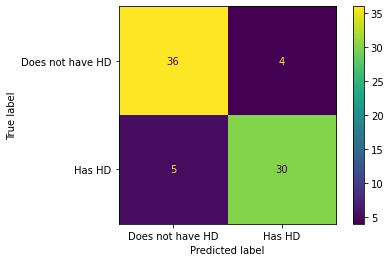

In [ ]:
plot_confusion_matrix(clf,
                      X_test_scaled,
                      y_test,
                      display_labels=["Does not have HD", "Has HD"])

TO DO: De acuerdo a la matriz anterior, cuál fue el accuracy de éste modelo? ¿Qué porcentaje de pacientes **sin** enfermedad de corazón quedaron bién clasificados? ¿Qué porcentaje de pacientes **con** enfermedad del corazón quedaron bién clasificados?

Basados en la anterior grafica podemos deducir que el numero de pacientes que no tienen la enfermedad del corazón que están bien clasificados son 36, por otro lado, los pacientes que tienen la enfermedad y quedaron bien clasificados son 30, mientras que las personas que no tenian ningún tipo de enfermedad pero que fueron clasificados como si la tuvieran fueron 4, y de forma contraria  las personas que tienen la enfermedad y fueron clasificados como si no tuvieran la enfermedad son 5, cabe resaltar que el accuracy obtenido fue del 88%, que son los valores predecidos correctamente.

Veamos si podemos mejorar estas métricas cambiando los hiperparámetros del modelo. Para esto utilizaremos GridSearch, para encontrar la mejor combinación de hiperparámetros 'C' y 'gamma'. Usaremos Kernel radial (RBF).

In [ ]:
num_features = np.size(X_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000],
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf']},
]


optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


Observe qué parametros se obtunvieron como óptimos entre los rangos seleccionados. A continuación utilicemos dichos parámetros para ver si mejoran los porcentajes.

In [ ]:
#TODO Entrenar un SVM con los parámetros óptimos. GRaficar la matriz de confusión y comparar
clf_svm = SVC(random_state=42, C=10, gamma=0.0001) #Completar
clf_svm.fit(X_train_scaled, y_train)


SVC(C=10, gamma=0.0001, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


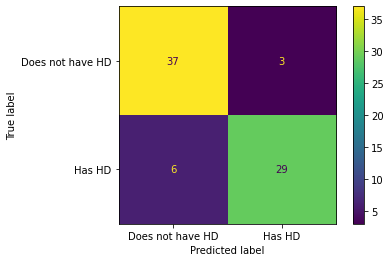

In [ ]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      display_labels=["Does not have HD", "Has HD"])

Basados en la anterior grafica podemos deducir que el numero de pacientes que no tienen la enfermedad del corazón que están bien clasificados son 49.3%, por otro lado, los pacientes que tienen la enfermedad y quedaron bien clasificados son 38.66%, mientras que las personas que no tenian ningún tipo de enfermedad pero que fueron clasificados como si la tuvieran fueron 4%, y de forma contraria las personas que tienen la enfermedad y fueron clasificados como si no tuvieran la enfermedad son 8%. Como observaciones adicionales, nos cambio muy poco el modelo a comparacion del anterior, unicamente disminuyo el porcentaje de bien clasificados que tienen la enfermedad y aumento los mal clasificados que tienen la enfermedad.

Queremos visualizar el resultado de entrenad un clasificador de Máquina de soporte vectorial. Sin embargo nuestros datos están en una dimensión que no podemos visualizar. Es por eso que haremos una reducción de la dimensionalidad de nuestros datos mediante un método llamado Principal Component Analysis (en el cual ahondaremos más adelante).

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

A continuación entrenaremos nuevamente un clasificador de SVM para nuestros datos con dimensión reducida, demanera que podamos visualizar la clasificación. Primero encontramos los parámetros óptimos

In [ ]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]


## pc1 contiene las coordenadas del eje x, después de aplicar PCA.
## pc2 contiene las coordenadas del eje y, después de aplicar PCA.

## Ahora centramos y escalamos los datos.
pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Optimizamos los hiperparámetros con los datos luego de la reducción de dimensión

num_features = np.size(pca_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000],
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring='roc_auc',
        verbose=0
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


Finalmente entrenamos nuestro clasificador con los parámetros óptimos y visualizamos su trabajo.

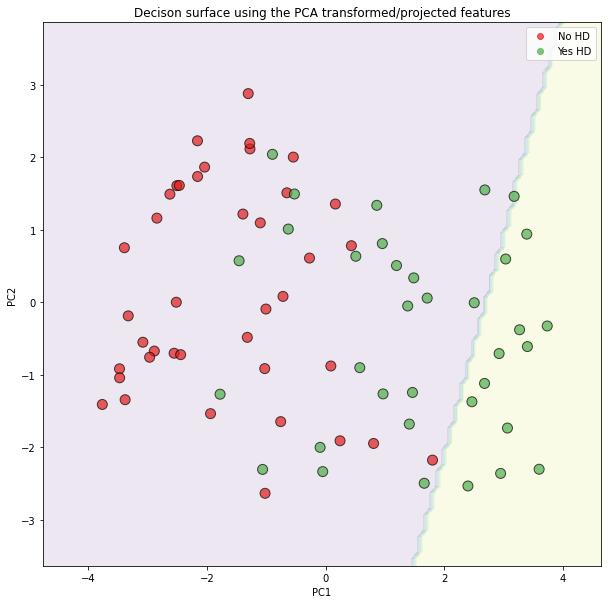

In [ ]:
clf_svm = SVC(random_state=42, C=10, gamma=0.0001) #Completar
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))


Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1)


cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])


scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test,
               cmap=cmap,
               s=100,
               edgecolors='k',
               alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")


ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')

plt.show()

En la grafica anterior observamos que la clasificación de los dos grupos se dio bastante bien, en especial en la clasificación de los positivos, en el otro grupo podemos ver positivos y negativos pero la mayoria son negativos, así que el margen de error no es muy grande.